Following example here: https://docs.qojulia.org/examples/jaynes-cummings/

In [1]:
using QuantumOptics
using PyPlot

In [2]:
# Parameters
N_cutoff = 10

ωc = 0.1
ωa = 0.1
Ω = 1.

1.0

In [3]:
# Bases
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

[Fock(cutoff=10) ⊗ Spin(1/2)]

In [4]:
# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)
H = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

Operator(dim=22x22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]sparse([1, 13, 2, 14, 3, 15, 4, 16, 5, 17  …  6, 18, 7, 19, 8, 20, 9, 21, 10, 22], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  18, 18, 19, 19, 20, 20, 21, 21, 22, 22], ComplexF64[0.05 + 0.0im, 1.0 + 0.0im, 0.15000000000000002 + 0.0im, 1.4142135623730951 + 0.0im, 0.25 + 0.0im, 1.7320508075688772 + 0.0im, 0.35000000000000003 + 0.0im, 2.0 + 0.0im, 0.45 + 0.0im, 2.23606797749979 + 0.0im  …  2.449489742783178 + 0.0im, 0.55 + 0.0im, 2.6457513110645907 + 0.0im, 0.65 + 0.0im, 2.8284271247461903 + 0.0im, 0.75 + 0.0im, 3.0 + 0.0im, 0.85 + 0.0im, 3.1622776601683795 + 0.0im, 0.95 + 0.0im], 22, 22)

In [5]:
H.data

22×22 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 42 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠑⢄⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠑⢄⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠑⎥
⎢⠑⢄⠀⠀⠀⠀⠑⢄⠀⠀⠀⎥
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠑⢄⠀⎥
⎣⠀⠀⠀⠀⠑⠀⠀⠀⠀⠀⠑⎦

In [6]:
# Initial state
α = 1.
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)

# Integration time
T = [0:0.1:20;]

# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H);

In [7]:
exp_n = real(expect(n ⊗ one(b_spin), Ψt))
exp_sz = real(expect(one(b_fock) ⊗ sz, Ψt));

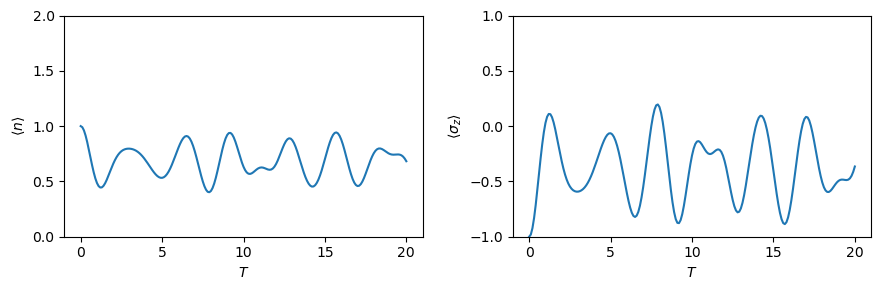

In [8]:
fig = figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n)
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz)
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

tight_layout()
display(fig)

## Lossy JC model

In [9]:
γ = 0.5
J = [sqrt(γ)*identityoperator(b_fock) ⊗ sm]

1-element Vector{Operator{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}}}:
 Operator(dim=22x22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]sparse([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ComplexF64[0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im, 0.7071067811865476 + 0.0im], 22, 22)

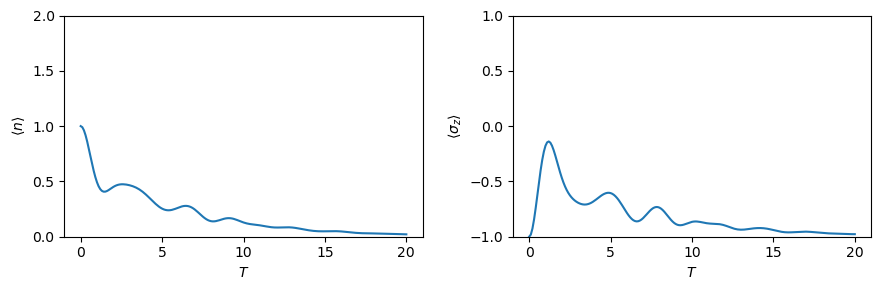

In [10]:
# Master
tout, ρt = timeevolution.master(T, Ψ0, H, J)
exp_n_master = real(expect(n ⊗ one(b_spin), ρt))
exp_sz_master = real(expect(one(b_fock) ⊗ sz, ρt))

fig = figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n_master);
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz_master);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout()
display(fig)

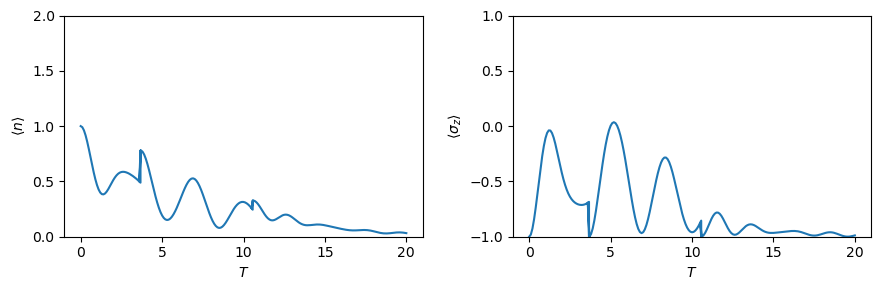

In [11]:
# Monte Carlo wave function
tout, Ψt = timeevolution.mcwf(T, Ψ0, H, J; seed=2,
                                display_beforeevent=true,
                                display_afterevent=true)
exp_n_mcwf = real(expect(n ⊗ one(b_spin), Ψt))
exp_sz_mcwf = real(expect(one(b_fock) ⊗ sz, Ψt))

fig = figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(tout, exp_n_mcwf)
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(tout, exp_sz_mcwf)
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout()
display(fig)

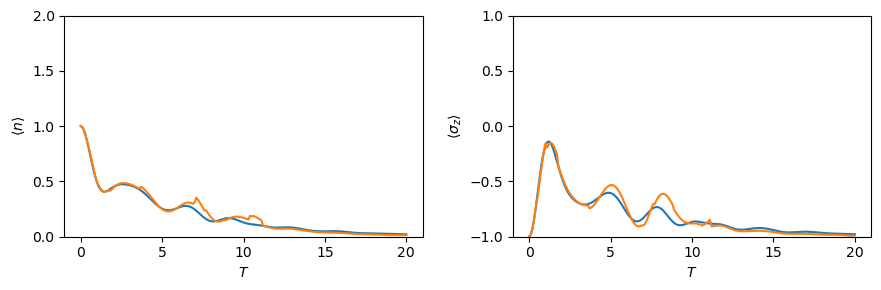

In [12]:
Ntrajectories = 10
exp_n_average = zeros(Float64, length(T))
exp_sz_average = zeros(Float64, length(T))

for i = 1:Ntrajectories
    t_tmp, ψ = timeevolution.mcwf(T, Ψ0, H, J; seed=i)
    exp_n_average .+= real(expect(n ⊗ one(b_spin), ψ))
    exp_sz_average .+= real(expect(one(b_fock) ⊗ sz, ψ))
end

exp_n_average ./= Ntrajectories
exp_sz_average ./= Ntrajectories

fig = figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n_master)
plot(T, exp_n_average)
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz_master)
plot(T, exp_sz_average)
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout()
display(fig)